Data Source:
https://www.ers.usda.gov/data-products/livestock-meat-domestic-data/livestock-meat-domestic-data/#All%20supply%20and%20disappearance

In [265]:
import numpy as np
import matplotlib.pyplot as plt
import random
import statistics
from statistics import stdev 
import pandas as pd
import math
from datetime import date


Red meat and poultry production (million pounds)

In [266]:
from pandas import ExcelWriter
from pandas import ExcelFile
df= pd.read_excel('RedMeatPoultry_ProdFull.xlsx')
df

,Red meat and poultry production (million pounds),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,Type 1/,Commercial 2/,NaN,NaN,NaN,NaN,NaN,Federally inspected,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Beef 3/,Veal 3/,Pork 3/,Lamb and mutton 3/,NaN,Total red meat 3/ 4/,Beef 3/,Veal 3/,Pork 3/,Lamb and mutton 3/,Total red meat 3/ 4/,Broilers 5/,Other chicken 5/,Turkey 5/,Total poultry 4/ 5/ 6/,Total red meat and poultry 4/,NaN
2,Jan-May 2020,10609.6,27.3,11334.8,58.5,NaN,22030.2,10449.7,26.4,11278.3,53.1,21807.6,18394.4,225.088,2337.49,21013,42820.6,NaN
3,Jan-May 2019,11003.5,30.7,11325.8,65.3,NaN,22425.4,10864.4,30.1,11273.5,59.4,22227.3,17802.1,215.335,2422.24,20499.8,42727.1,NaN
4,May-2020,1865.1,5.2,1878,12.6,NaN,3760.8,1827.6,5,1863.8,11.3,3707.7,3557.4,43.66,427.474,4037.03,7744.73,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,4/ Totals may not add due to rounding.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
733,5/ Ready-to-cook.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
734,"6/ Includes geese, guineas, ostriches, emus, r...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
735,"Source: USDA, National Agricultural Statistics...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [267]:
df.columns = df.iloc[1]

In [268]:
df=df.drop(df.index[0])
df=df.drop(df.index[0])
df

1,NaN,Beef 3/,Veal 3/,Pork 3/,Lamb and mutton 3/,NaN,Total red meat 3/ 4/,Beef 3/,Veal 3/,Pork 3/,Lamb and mutton 3/,Total red meat 3/ 4/,Broilers 5/,Other chicken 5/,Turkey 5/,Total poultry 4/ 5/ 6/,Total red meat and poultry 4/,NaN
2,Jan-May 2020,10609.6,27.3,11334.8,58.5,NaN,22030.2,10449.7,26.4,11278.3,53.1,21807.6,18394.4,225.088,2337.49,21013,42820.6,NaN
3,Jan-May 2019,11003.5,30.7,11325.8,65.3,NaN,22425.4,10864.4,30.1,11273.5,59.4,22227.3,17802.1,215.335,2422.24,20499.8,42727.1,NaN
4,May-2020,1865.1,5.2,1878,12.6,NaN,3760.8,1827.6,5,1863.8,11.3,3707.7,3557.4,43.66,427.474,4037.03,7744.73,NaN
5,Apr-2020,1815.4,4.8,2030.8,11.1,NaN,3862.2,1782,4.6,2019.4,9.9,3815.9,3600.26,46.145,441.312,4098.86,7914.76,NaN
6,Mar-2020,2410.8,5.8,2566.5,12.2,NaN,4995.3,2379.2,5.6,2555.2,11.3,4951.3,3861.22,47.137,507.029,4427.82,9379.12,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,4/ Totals may not add due to rounding.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
733,5/ Ready-to-cook.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
734,"6/ Includes geese, guineas, ostriches, emus, r...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
735,"Source: USDA, National Agricultural Statistics...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [269]:
df

1,NaN,Beef 3/,Veal 3/,Pork 3/,Lamb and mutton 3/,NaN,Total red meat 3/ 4/,Beef 3/,Veal 3/,Pork 3/,Lamb and mutton 3/,Total red meat 3/ 4/,Broilers 5/,Other chicken 5/,Turkey 5/,Total poultry 4/ 5/ 6/,Total red meat and poultry 4/,NaN
2,Jan-May 2020,10609.6,27.3,11334.8,58.5,NaN,22030.2,10449.7,26.4,11278.3,53.1,21807.6,18394.4,225.088,2337.49,21013,42820.6,NaN
3,Jan-May 2019,11003.5,30.7,11325.8,65.3,NaN,22425.4,10864.4,30.1,11273.5,59.4,22227.3,17802.1,215.335,2422.24,20499.8,42727.1,NaN
4,May-2020,1865.1,5.2,1878,12.6,NaN,3760.8,1827.6,5,1863.8,11.3,3707.7,3557.4,43.66,427.474,4037.03,7744.73,NaN
5,Apr-2020,1815.4,4.8,2030.8,11.1,NaN,3862.2,1782,4.6,2019.4,9.9,3815.9,3600.26,46.145,441.312,4098.86,7914.76,NaN
6,Mar-2020,2410.8,5.8,2566.5,12.2,NaN,4995.3,2379.2,5.6,2555.2,11.3,4951.3,3861.22,47.137,507.029,4427.82,9379.12,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,4/ Totals may not add due to rounding.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
733,5/ Ready-to-cook.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
734,"6/ Includes geese, guineas, ostriches, emus, r...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
735,"Source: USDA, National Agricultural Statistics...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [270]:
df.rename(columns={list(df)[0]:'Date'}, inplace=True)


In [271]:

df1=df.drop(df.index[0])

df1


1,Date,Beef 3/,Veal 3/,Pork 3/,Lamb and mutton 3/,NaN,Total red meat 3/ 4/,Beef 3/,Veal 3/,Pork 3/,Lamb and mutton 3/,Total red meat 3/ 4/,Broilers 5/,Other chicken 5/,Turkey 5/,Total poultry 4/ 5/ 6/,Total red meat and poultry 4/,NaN
3,Jan-May 2019,11003.5,30.7,11325.8,65.3,NaN,22425.4,10864.4,30.1,11273.5,59.4,22227.3,17802.1,215.335,2422.24,20499.8,42727.1,NaN
4,May-2020,1865.1,5.2,1878,12.6,NaN,3760.8,1827.6,5,1863.8,11.3,3707.7,3557.4,43.66,427.474,4037.03,7744.73,NaN
5,Apr-2020,1815.4,4.8,2030.8,11.1,NaN,3862.2,1782,4.6,2019.4,9.9,3815.9,3600.26,46.145,441.312,4098.86,7914.76,NaN
6,Mar-2020,2410.8,5.8,2566.5,12.2,NaN,4995.3,2379.2,5.6,2555.2,11.3,4951.3,3861.22,47.137,507.029,4427.82,9379.12,NaN
7,Feb-2020,2130.7,5.1,2306.2,10.7,NaN,4452.7,2104.1,5,2296.8,9.7,4415.7,3418.46,41.566,446.736,3917.54,8333.24,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,4/ Totals may not add due to rounding.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
733,5/ Ready-to-cook.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
734,"6/ Includes geese, guineas, ostriches, emus, r...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
735,"Source: USDA, National Agricultural Statistics...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [272]:
df1=df1.drop(df1.index[0])


In [273]:
df2=df1.head(449)

In [274]:
# df2=df1.head(100)

df2["Date"]=pd.to_datetime(df2['Date'], format='%b-%Y')
df2
# df2
# df2
# calendar.month_abbr[2]
# df['Month'] = df['Month'].apply(lambda x: calendar.month_abbr[x])str.slice(stop=3)


/Users/aslihancelik/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


1,Date,Beef 3/,Veal 3/,Pork 3/,Lamb and mutton 3/,NaN,Total red meat 3/ 4/,Beef 3/,Veal 3/,Pork 3/,Lamb and mutton 3/,Total red meat 3/ 4/,Broilers 5/,Other chicken 5/,Turkey 5/,Total poultry 4/ 5/ 6/,Total red meat and poultry 4/,NaN
4,2020-05-01,1865.1,5.2,1878,12.6,NaN,3760.8,1827.6,5,1863.8,11.3,3707.7,3557.4,43.66,427.474,4037.03,7744.73,NaN
5,2020-04-01,1815.4,4.8,2030.8,11.1,NaN,3862.2,1782,4.6,2019.4,9.9,3815.9,3600.26,46.145,441.312,4098.86,7914.76,NaN
6,2020-03-01,2410.8,5.8,2566.5,12.2,NaN,4995.3,2379.2,5.6,2555.2,11.3,4951.3,3861.22,47.137,507.029,4427.82,9379.12,NaN
7,2020-02-01,2130.7,5.1,2306.2,10.7,NaN,4452.7,2104.1,5,2296.8,9.7,4415.7,3418.46,41.566,446.736,3917.54,8333.24,NaN
8,2020-01-01,2387.6,6.4,2553.3,11.9,NaN,4959.2,2356.8,6.2,2543.1,10.9,4917,3957.06,46.58,514.942,4531.76,9448.76,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,1983-05-01,1859,32,1243,30,NaN,3163.3,1783,27,1208,29,3047,1096.25,NaN,183.721,1329.39,4376.39,NaN
449,1983-04-01,1727,32,1262,30,NaN,3051.3,1650,26,1227,29,2933,1054.29,NaN,166.502,1274.82,4207.82,NaN
450,1983-03-01,1892,37,1303,36,NaN,3268.7,1808,32,1265,36,3141,1106.18,NaN,182.68,1348.98,4489.98,NaN
451,1983-02-01,1707,32,1021,27,NaN,2786.7,1632,26,988,26,2673,933.564,NaN,135.482,1116.63,3789.63,NaN


In [ ]:
'Total red meat 3/ 4/''Total red meat and poultry 4/''

In [275]:
df2.rename(columns={list(df)[-1]:'Sum'}, inplace=True)


In [276]:
df2.rename(columns={list(df)[6]:'Total red'}, inplace=True)

In [277]:
df2

1,Date,Beef 3/,Veal 3/,Pork 3/,Lamb and mutton 3/,NaN,Total red,Beef 3/,Veal 3/,Pork 3/,Lamb and mutton 3/,Total red,Broilers 5/,Other chicken 5/,Turkey 5/,Total poultry 4/ 5/ 6/,Total red meat and poultry 4/,Sum
4,2020-05-01,1865.1,5.2,1878,12.6,NaN,3760.8,1827.6,5,1863.8,11.3,3707.7,3557.4,43.66,427.474,4037.03,7744.73,NaN
5,2020-04-01,1815.4,4.8,2030.8,11.1,NaN,3862.2,1782,4.6,2019.4,9.9,3815.9,3600.26,46.145,441.312,4098.86,7914.76,NaN
6,2020-03-01,2410.8,5.8,2566.5,12.2,NaN,4995.3,2379.2,5.6,2555.2,11.3,4951.3,3861.22,47.137,507.029,4427.82,9379.12,NaN
7,2020-02-01,2130.7,5.1,2306.2,10.7,NaN,4452.7,2104.1,5,2296.8,9.7,4415.7,3418.46,41.566,446.736,3917.54,8333.24,NaN
8,2020-01-01,2387.6,6.4,2553.3,11.9,NaN,4959.2,2356.8,6.2,2543.1,10.9,4917,3957.06,46.58,514.942,4531.76,9448.76,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,1983-05-01,1859,32,1243,30,NaN,3163.3,1783,27,1208,29,3047,1096.25,NaN,183.721,1329.39,4376.39,NaN
449,1983-04-01,1727,32,1262,30,NaN,3051.3,1650,26,1227,29,2933,1054.29,NaN,166.502,1274.82,4207.82,NaN
450,1983-03-01,1892,37,1303,36,NaN,3268.7,1808,32,1265,36,3141,1106.18,NaN,182.68,1348.98,4489.98,NaN
451,1983-02-01,1707,32,1021,27,NaN,2786.7,1632,26,988,26,2673,933.564,NaN,135.482,1116.63,3789.63,NaN


In [278]:
df3=df2['Total red']
df4=df3.iloc[:,0]
df4

4      3760.8
5      3862.2
6      4995.3
7      4452.7
8      4959.2
        ...  
448    3163.3
449    3051.3
450    3268.7
451    2786.7
452    3150.7
Name: Total red, Length: 449, dtype: object

In [279]:
df2["Sum"]=df4+df2['Total red meat and poultry 4/']
df2

/Users/aslihancelik/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


1,Date,Beef 3/,Veal 3/,Pork 3/,Lamb and mutton 3/,NaN,Total red,Beef 3/,Veal 3/,Pork 3/,Lamb and mutton 3/,Total red,Broilers 5/,Other chicken 5/,Turkey 5/,Total poultry 4/ 5/ 6/,Total red meat and poultry 4/,Sum
4,2020-05-01,1865.1,5.2,1878,12.6,NaN,3760.8,1827.6,5,1863.8,11.3,3707.7,3557.4,43.66,427.474,4037.03,7744.73,11505.5
5,2020-04-01,1815.4,4.8,2030.8,11.1,NaN,3862.2,1782,4.6,2019.4,9.9,3815.9,3600.26,46.145,441.312,4098.86,7914.76,11777
6,2020-03-01,2410.8,5.8,2566.5,12.2,NaN,4995.3,2379.2,5.6,2555.2,11.3,4951.3,3861.22,47.137,507.029,4427.82,9379.12,14374.4
7,2020-02-01,2130.7,5.1,2306.2,10.7,NaN,4452.7,2104.1,5,2296.8,9.7,4415.7,3418.46,41.566,446.736,3917.54,8333.24,12785.9
8,2020-01-01,2387.6,6.4,2553.3,11.9,NaN,4959.2,2356.8,6.2,2543.1,10.9,4917,3957.06,46.58,514.942,4531.76,9448.76,14408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,1983-05-01,1859,32,1243,30,NaN,3163.3,1783,27,1208,29,3047,1096.25,NaN,183.721,1329.39,4376.39,7539.69
449,1983-04-01,1727,32,1262,30,NaN,3051.3,1650,26,1227,29,2933,1054.29,NaN,166.502,1274.82,4207.82,7259.12
450,1983-03-01,1892,37,1303,36,NaN,3268.7,1808,32,1265,36,3141,1106.18,NaN,182.68,1348.98,4489.98,7758.68
451,1983-02-01,1707,32,1021,27,NaN,2786.7,1632,26,988,26,2673,933.564,NaN,135.482,1116.63,3789.63,6576.33


In [280]:
time_series_data = df2[['Date', 'Sum']].copy()
time_series_data

1,Date,Sum
4,2020-05-01,11505.5
5,2020-04-01,11777
6,2020-03-01,14374.4
7,2020-02-01,12785.9
8,2020-01-01,14408
...,...,...
448,1983-05-01,7539.69
449,1983-04-01,7259.12
450,1983-03-01,7758.68
451,1983-02-01,6576.33


In [281]:
time_series_data2020=time_series_data[time_series_data['Date'] < pd.Timestamp(date(2021,1,1))] 
time_series_data2020=time_series_data2020[time_series_data2020['Date'] >= pd.Timestamp(date(2020,1,1))]
time_series_data2020

1,Date,Sum
4,2020-05-01,11505.5
5,2020-04-01,11777
6,2020-03-01,14374.4
7,2020-02-01,12785.9
8,2020-01-01,14408


In [282]:
time_series_data2019=time_series_data[time_series_data['Date'] < pd.Timestamp(date(2020,1,1))] 
time_series_data2019=time_series_data2019[time_series_data2019['Date'] >= pd.Timestamp(date(2019,1,1))]
time_series_data2019

1,Date,Sum
9,2019-12-01,13565.1
10,2019-11-01,13400
11,2019-10-01,14792.6
12,2019-09-01,13044.8
13,2019-08-01,13666.3
14,2019-07-01,13560.1
15,2019-06-01,12763.3
16,2019-05-01,13472.5
17,2019-04-01,13191.7
18,2019-03-01,12767.7


In [283]:

time_series_data2019.datetime = pd.to_datetime(time_series_data2019.Date)
time_series_data2019.set_index('Date', inplace=True)

/Users/aslihancelik/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [284]:
time_series_data2019.rename(columns={list(df)[-1]:'Total Red Meat and Poultry'}, inplace=True)


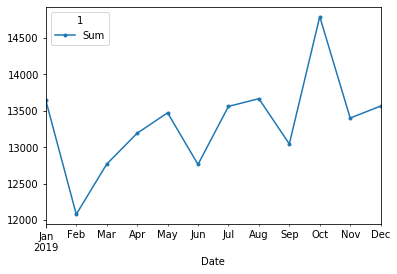

In [285]:
time_series_data2019.plot(style='.-')

In [286]:
# time_series_data_last3=time_series_data[time_series_data['Date'] < pd.Timestamp(date(2021,1,1))] 
# time_series_data_last3=time_series_data_last3[time_series_data_last3['Date'] >= pd.Timestamp(date(2018,1,1))]
time_series_data_last3

1,Date,Sum
4,2020-05-01,11505.5
5,2020-04-01,11777
6,2020-03-01,14374.4
7,2020-02-01,12785.9
8,2020-01-01,14408
9,2019-12-01,13565.1
10,2019-11-01,13400
11,2019-10-01,14792.6
12,2019-09-01,13044.8
13,2019-08-01,13666.3


In [287]:
time_series_data_last3.datetime = pd.to_datetime(time_series_data_last3.Date)
time_series_data_last3.set_index('Date', inplace=True)

/Users/aslihancelik/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [288]:
time_series_data_last3

1,Sum
Date,
2020-05-01,11505.5
2020-04-01,11777
2020-03-01,14374.4
2020-02-01,12785.9
2020-01-01,14408
2019-12-01,13565.1
2019-11-01,13400
2019-10-01,14792.6
2019-09-01,13044.8


In [289]:
time_series_data_last3=time_series_data_last3.sort_values(by='Date')

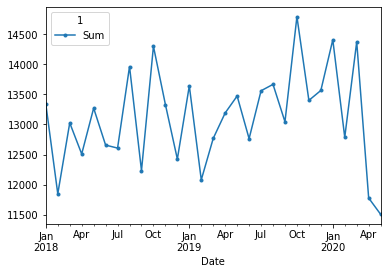

In [290]:
time_series_data_last3.plot(style='.-')

There are both trends and seasonality. Therefore we can use Winter's Method for forecasting.

In [291]:
# time_series_data_last3_new = time_series_data_last3.set_index('Date')
time_series_data_last3

1,Sum
Date,
2018-01-01,13338.3
2018-02-01,11846.4
2018-03-01,13026
2018-04-01,12509
2018-05-01,13271
2018-06-01,12656.7
2018-07-01,12606.8
2018-08-01,13962.8
2018-09-01,12232.2


In [309]:
hi=time_series_data_last3["Sum"]
hi

Date
2018-01-01    13338.3
2018-02-01    11846.4
2018-03-01      13026
2018-04-01      12509
2018-05-01      13271
2018-06-01    12656.7
2018-07-01    12606.8
2018-08-01    13962.8
2018-09-01    12232.2
2018-10-01    14299.5
2018-11-01    13331.6
2018-12-01    12424.1
2019-01-01    13642.1
2019-02-01    12078.5
2019-03-01    12767.7
2019-04-01    13191.7
2019-05-01    13472.5
2019-06-01    12763.3
2019-07-01    13560.1
2019-08-01    13666.3
2019-09-01    13044.8
2019-10-01    14792.6
2019-11-01      13400
2019-12-01    13565.1
2020-01-01      14408
2020-02-01    12785.9
2020-03-01    14374.4
2020-04-01      11777
2020-05-01    11505.5
Freq: MS, Name: Sum, dtype: object

In [310]:

time_log = np.log(hi.astype('float'))

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [311]:

ets_stl = ExponentialSmoothing((time_log) ,seasonal_periods=12 ,trend='add', seasonal='add').fit()
ets_stl1 = ets_stl.forecast(len(time_log))

 ## Exponential Smoothing Holt-Winter's Method

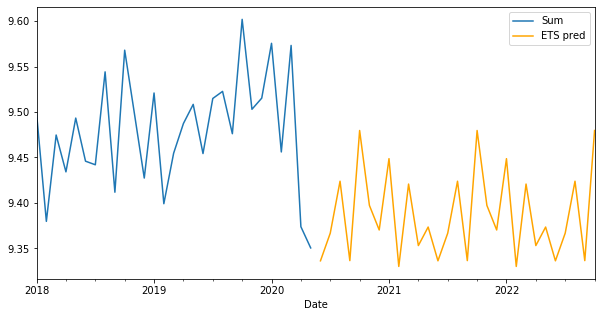

In [301]:

time_log.plot(kind="line",figsize=(10,5),legend=True)
ets_stl1.plot(kind="line",figsize=(10,5),color='orange',legend=True,label='ETS pred')

When the supply of first 4 months o9f 2020 during Covid19 is included.

In [306]:

time_log = np.log(hi.head(24).astype('float'))

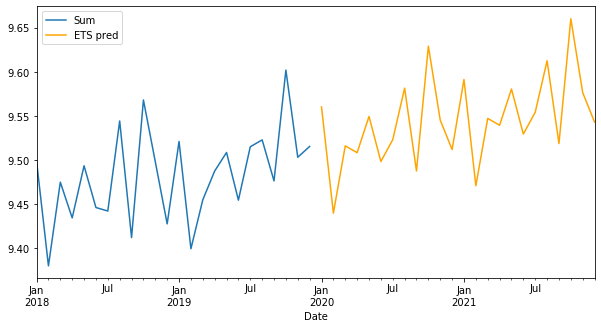

In [308]:

time_log.plot(kind="line",figsize=(10,5),legend=True)
ets_stl1.plot(kind="line",figsize=(10,5),color='orange',legend=True,label='ETS pred')

When the supply of first 4 months of 2020 during Covid19 is not included.

## Intro to ARIMA

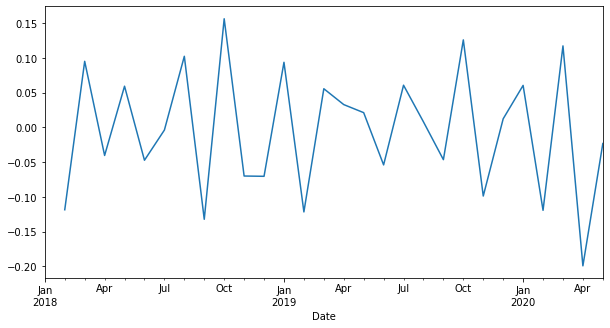

In [312]:

from statsmodels.tsa.arima_model import ARIMA
 
time_log_diff = time_log - time_log.shift()
time_log_diff.plot(kind="line",figsize=(10,5))

introduction to arima

In [319]:

# from sklearn import metrics

# model_ARIMA = ARIMA(time_log, order=(2,1,2))  
# results_AR = model_ARIMA.fit(disp=-1)  
# time_log_diff.plot(kind="line",figsize=(10,5),title=('MSE: %.4f'% metrics.mean_squared_error(time_log_diff,results_AR.fittedvalues)),label='time_log_diff',legend=True)
# results_AR.fittedvalues.plot(kind="line",figsize=(10,5),color='orange',label='ARIMA Results',legend=True)

## Winter's Method for 